In [23]:
from collections import defaultdict
import numpy as np # needed for arrays
import pandas as pd # data frame
import matplotlib.pyplot as plt # modifying plot
from sklearn.model_selection import train_test_split # splitting data
from sklearn.preprocessing import StandardScaler # scaling data
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA # PCA package
from sklearn.metrics import accuracy_score # grading
from sklearn.metrics import confusion_matrix # generate the matrix
import warnings
warnings.filterwarnings('ignore')

In [24]:
data = pd.read_csv('./sonar_all_data_2.csv', header=None)

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61],
           dtype='int64')

In [25]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1,R


In [26]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507,1.533654
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031,0.500070
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600,1.000000
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100,1.000000
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300,2.000000
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525,2.000000
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900,2.000000


<AxesSubplot:>

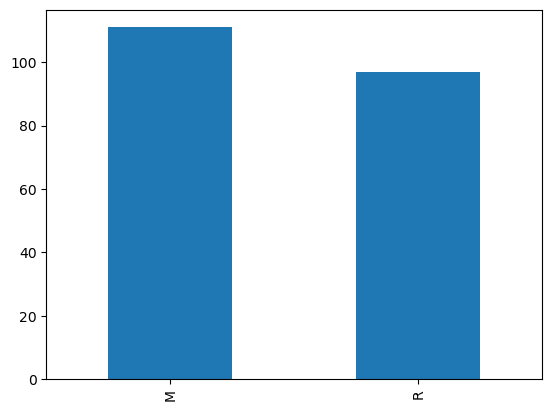

In [27]:
data[61].value_counts().plot(kind='bar')

In [28]:
X = data.drop(columns=61, axis=1)
y = data[61]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## Perform Scaling

In [30]:
# 1. Perform Standard Scaling

stdscl = StandardScaler()
X_train_std = stdscl.fit_transform(X_train)
X_test_std = stdscl.fit_transform(X_test)

## Run PCA for 1 to 61 features over an MLP Classifier

#### 2) For each number of components used, print the number of components and the accuracy achieved. (Use test accuracy.)

In [31]:
## Parameters obtained after running grid search
HIDDEN_LAYER = (100,)
ALPHA = 6.4e-5

In [32]:
# Perform PCA for 2 features
accuracy_comp = list()
model = MLPClassifier(hidden_layer_sizes=HIDDEN_LAYER, activation='logistic', max_iter=2000, alpha=ALPHA,
     solver='adam', tol=0.0001)
for idx in range(1, 62):
    pca = PCA(n_components=idx) # only keep two "best" features!
    X_train_pca = pca.fit_transform(X_train_std) # apply to the train data
    X_test_pca = pca.transform(X_test_std) # do the same to the test data
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    accuracy = round(accuracy_score(y_test, y_pred) * 100.0, 3)
    
    accuracy_comp.append({
        'component_id': idx,
        'accuracy': accuracy,
        'predictions': y_pred
    })
    print(f"Epoch : {idx} => Accuracy for MLP on PCA with component_size({idx}) is {accuracy}%")

Epoch : 1 => Accuracy for MLP on PCA with component_size(1) is 58.73%
Epoch : 2 => Accuracy for MLP on PCA with component_size(2) is 68.254%
Epoch : 3 => Accuracy for MLP on PCA with component_size(3) is 80.952%
Epoch : 4 => Accuracy for MLP on PCA with component_size(4) is 84.127%
Epoch : 5 => Accuracy for MLP on PCA with component_size(5) is 77.778%
Epoch : 6 => Accuracy for MLP on PCA with component_size(6) is 87.302%
Epoch : 7 => Accuracy for MLP on PCA with component_size(7) is 92.063%
Epoch : 8 => Accuracy for MLP on PCA with component_size(8) is 90.476%
Epoch : 9 => Accuracy for MLP on PCA with component_size(9) is 95.238%
Epoch : 10 => Accuracy for MLP on PCA with component_size(10) is 98.413%
Epoch : 11 => Accuracy for MLP on PCA with component_size(11) is 96.825%
Epoch : 12 => Accuracy for MLP on PCA with component_size(12) is 95.238%
Epoch : 13 => Accuracy for MLP on PCA with component_size(13) is 95.238%
Epoch : 14 => Accuracy for MLP on PCA with component_size(14) is 95.23

#### 3) At the end, print the maximum accuracy along with the number of components that achieved that accuracy.

In [33]:
print(accuracy_comp[:2])

[{'component_id': 1, 'accuracy': 58.73, 'predictions': array(['M', 'M', 'R', 'M', 'M', 'R', 'M', 'M', 'R', 'M', 'M', 'R', 'R',
       'M', 'R', 'R', 'M', 'R', 'R', 'R', 'R', 'M', 'M', 'M', 'R', 'M',
       'M', 'M', 'M', 'M', 'R', 'M', 'M', 'R', 'M', 'M', 'M', 'M', 'M',
       'R', 'M', 'R', 'M', 'R', 'M', 'R', 'R', 'R', 'R', 'M', 'R', 'R',
       'R', 'R', 'R', 'M', 'M', 'M', 'R', 'M', 'R', 'M', 'M'], dtype='<U1')}, {'component_id': 2, 'accuracy': 68.254, 'predictions': array(['M', 'M', 'R', 'R', 'M', 'R', 'M', 'M', 'R', 'M', 'M', 'R', 'M',
       'M', 'M', 'R', 'M', 'R', 'M', 'R', 'M', 'R', 'M', 'M', 'R', 'R',
       'R', 'M', 'M', 'M', 'R', 'R', 'R', 'R', 'M', 'M', 'M', 'R', 'M',
       'M', 'R', 'R', 'M', 'R', 'M', 'M', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'M', 'R', 'R', 'M', 'M', 'M', 'M', 'R', 'M', 'M'], dtype='<U1')}]


In [34]:
max_accuracy_item = max(accuracy_comp, key=lambda x: x['accuracy'])

components_with_max_accuracy = [item['component_id'] for item in accuracy_comp if item['accuracy'] == max_accuracy_item['accuracy']]
print("Max Accuracy: ", max_accuracy_item['accuracy'])
print(f"Components the max accuracy : {components_with_max_accuracy}")

Max Accuracy:  100.0
Components the max accuracy : [22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]


#### 4) Plot accuracy versus the number of components.

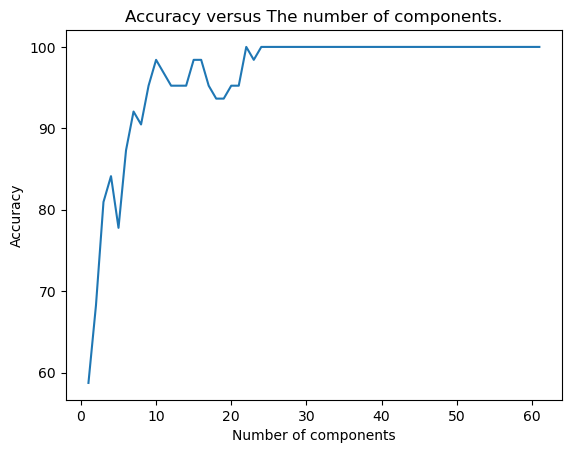

In [35]:
plt.plot([x['component_id'] for x in accuracy_comp], [y['accuracy'] for y in accuracy_comp])
plt.title('Accuracy versus The number of components.')
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.show()

#### 5) Print the confusion matrix which results from the analysis which resulted in the maximum accuracy

In [36]:
conf_mat = confusion_matrix(
        y_test, max_accuracy_item['predictions'])
print(conf_mat)

[[35  0]
 [ 0 28]]
